In [3]:
import pandas as pd
import mplfinance as pfp  # Note: The correct name for this library seems to be 'mplfinance'
import yfinance as yf

# Get data from Yahoo Finance
data = yf.download('AAPL', start='2020-01-01')

[*********************100%***********************]  1 of 1 completed


In [29]:
# Start,End,Open,High,Low,Close,Volume,Market Cap
data = pd.read_csv('bitcoin_2024-01-01_2024-09-27.csv', 
                   parse_dates=['Start', 'End'],
                   dtype={ 
                       'Open': 'float32', 'Close': 'float32', 
                       'High': 'float32', 'Low': 'float32',
                       'Volume': 'float32', "Market Cap": 'float32'
                       }
                    )

In [31]:
data.dtypes

Start         datetime64[ns]
End           datetime64[ns]
Open                 float32
High                 float32
Low                  float32
Close                float32
Volume               float32
Market Cap           float32
dtype: object

In [32]:
data.set_index('Start', inplace=True)

In [33]:
# Calculate MACD and its Signal Line
data['MA_12'] = data['Close'].rolling(window=12).mean()
data['MA_26'] = data['Close'].rolling(window=26).mean()
data['MACD'] = data['MA_12'] - data['MA_26']
data['Signal'] = data['MACD'].rolling(window=9).mean()

# Calculate MACD Histogram
data['MACDHist'] = data['MACD'] - data['Signal']

# Prepare the data for plotting (mplfinance requires specific formatting)
new_data = {'Close': data['Close'],
            'macdhist': data['MACDHist'].fillna(0)  # Fill NaN values in hist with 0
           }

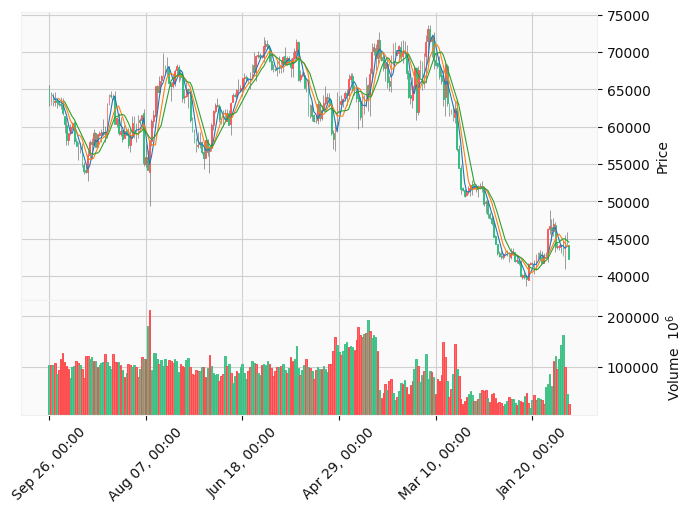

In [34]:
pfp.plot(data,type='candle',mav=(3,6,9),volume=True, style='yahoo')

In [ ]:
# Prepare the data for plotting (mplfinance requires specific formatting)
new_data = {'Close': data['Close'],
            'macdhist': data['MACDHist'].fillna(0)  # Fill NaN values in hist with 0
           }

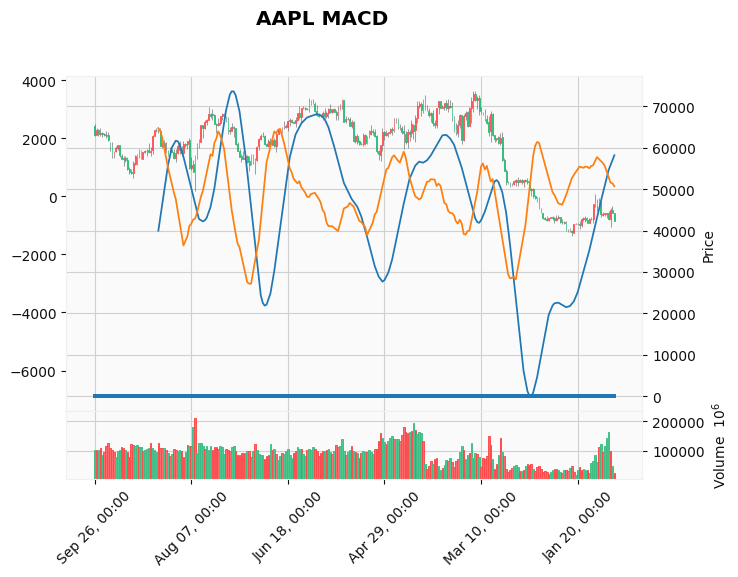

In [38]:
# Plotting with candlestick and macd plot overlayed on top of it
pfp.plot(data, 
         type='candle', 
         volume=True, 
         title='AAPL MACD', 
         ylabel='Price', 
         #ylabelrotation=270, 
         addplot=[pfp.make_addplot(data['Signal']), pfp.make_addplot(data['MACDHist'])],
         hlines=[0], 
         panel_ratios=(5, 1), 
         style='yahoo'
)